<a href="https://colab.research.google.com/github/dulrojas/machinelearning-az/blob/master/DS_C3_SC1_MAURO_ROJAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*******************************************************************
PRACTICA DE:  VISUALIZACIÓN DE DATOS CON PYTHON

MAURO ROJAS - GEN JUL2023
*******************************************************************
1. Genera una libreta en Google Colab, cuya estructura esté basada en los análisis solicitados.
2.	Guarda en un dataframe (happiness) todos los registros del archivo Happiness_report.csv.


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_rows = 10
happiness = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Happiness_report.csv")

happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


3.	A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice.

In [12]:
mexico = happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
mexico

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (score) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto

Text(6.595, 0, 'MEX')

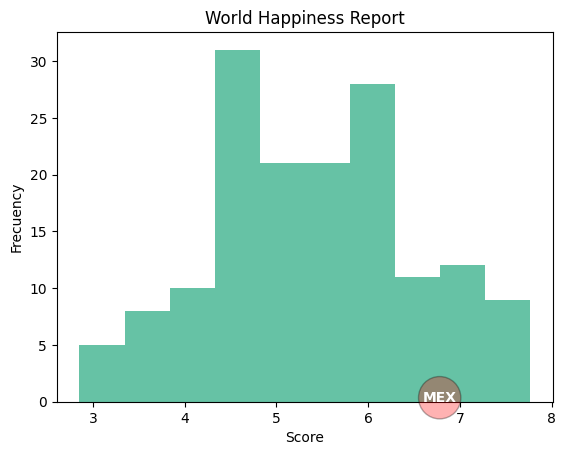

In [13]:
# Lleva a otro DF, solo lo necesario
happiness2 = happiness[['Country or region','Score']]
happiness2.set_index('Country or region',inplace=True)
# Crea gráfico personalizado
plt.title('World Happiness Report')
plt.xlabel('Score')
plt.ylabel('Frecuency')
plt.hist(happiness2['Score'], color='#66C2A5')
value = happiness2.loc['Mexico','Score']
props_bbox = {'boxstyle': 'circle', 'facecolor': 'red', 'alpha': 0.3}
plt.text(value,0,'MEX',fontweight='bold', color='white',bbox=props_bbox)

5.	Construye un boxplot para la columna esperanza de vida (Healthy life expectancy). Ubica el valor de México con una anotación.

Text(1.2, 0.911, '')

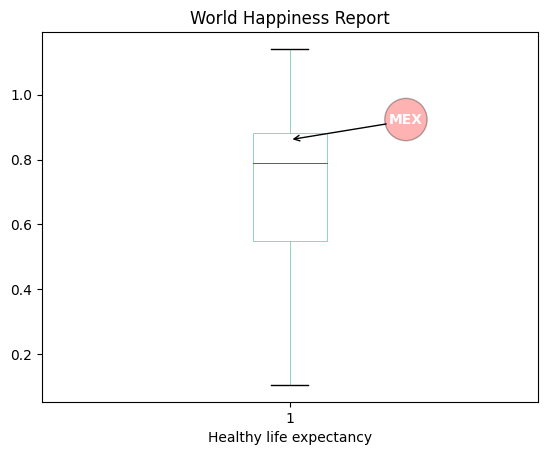

In [14]:
# Lleva a otro DF, solo lo necesario
happiness3 = happiness[['Country or region','Healthy life expectancy']]
happiness3.set_index('Country or region',inplace=True)
# Crea gráfico personalizado
plt.title('World Happiness Report')
plt.xlabel('Healthy life expectancy')
plt.boxplot(happiness3['Healthy life expectancy'].dropna(), patch_artist=True,
                showmeans=False, showfliers=False,
                medianprops={"color": "blue", "linewidth": 0.5},
                boxprops={"facecolor": "white", "edgecolor": "#66C2A5",
                          "linewidth": 0.5},
                whiskerprops={"color": "#66C2A5", "linewidth": 0.5})
value = happiness3.loc['Mexico','Healthy life expectancy']
props_bbox = {'boxstyle': 'circle', 'facecolor': 'red', 'alpha': 0.3}
plt.text(1.2,value+0.05,'MEX',fontweight='bold', color='white',bbox=props_bbox)
plt.annotate('',xy=(1,value),xytext=(1.2,value + 0.05),arrowprops=dict(arrowstyle='->'))

6.	Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México.

In [15]:
# Prepara tabla de Mexico
mexico2 = happiness[happiness['Country or region']=='Mexico']
mexico2.set_index('Country or region',inplace=True)
mexico2 = mexico[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
mexico2 = mexico2.T
mexico2.index.name = 'Indicador'
mexico2.columns.name = ''
mexico2.columns = ['Factor']
mexico2

,Factor
Indicador,
GDP per capita,1.070
Social support,1.323
Healthy life expectancy,0.861
Freedom to make life choices,0.433
Generosity,0.074
Perceptions of corruption,0.073


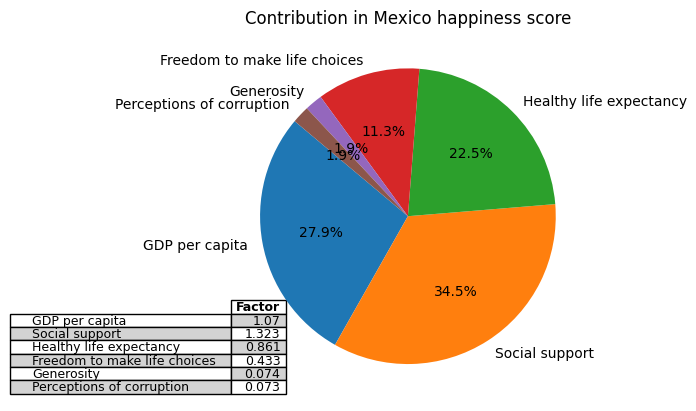

In [16]:
# Crear el gráfico
plt.pie(mexico2['Factor'],labels=mexico2.index,autopct='%1.1f%%', startangle=140)
plt.title('Contribution in Mexico happiness score')  # Título del gráfico
# Crea la tabla
tabla= plt.table(cellText=mexico2.values,colLabels=mexico2.columns,rowLabels=mexico2.index, loc='lower left')
tabla.scale(0.15,0.8)
# Colores para las filas intermitentes
colores_filas = ['lightgray', 'white']
# Aplicar colores a las filas de la tabla
for i, key in enumerate(tabla.get_celld().keys()):
    cell = tabla.get_celld()[key]
    if key[0] == 0:
        cell.set_text_props(fontweight='bold')
    else:
        cell.set_facecolor(colores_filas[i % 2])

             #cellLoc='center',edges='horizontal')
tabla.auto_set_font_size(False)
tabla.set_fontsize(9)

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

<Axes: title={'center': 'World Happiness Report'}, ylabel='Rate x 1000'>

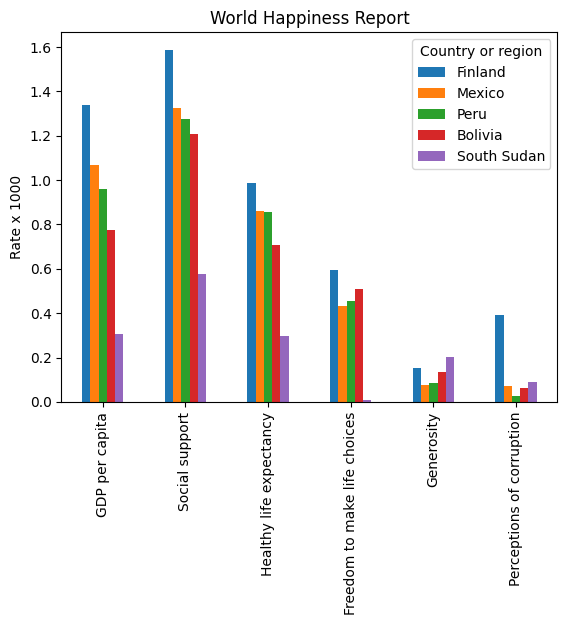

In [17]:
# Elegimos el país más feliz y el menos felíz
pais_mas_feliz = happiness[happiness['Score'] == happiness['Score'].max()]
pais_menos_feliz = happiness[happiness['Score'] == happiness['Score'].min()]
# Elegimos a Mexico y otros 2 paises de interes
pais_mexico = happiness[happiness['Country or region'] == 'Mexico']
pais_bolivia = happiness[happiness['Country or region'] == 'Bolivia']
pais_peru = happiness[happiness['Country or region'] == 'Peru']
# Crear un nuevo DataFrame con los países seleccionados
paises5 = pd.concat([pais_mas_feliz, pais_mexico, pais_peru, pais_bolivia, pais_menos_feliz])
# Seleccionamos las columnas que nos interesan
paises5.set_index('Country or region',inplace=True)
paises5 = paises5[['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']]
paises5 = paises5.T
# Graficamos
paises5.plot.bar(title='World Happiness Report',ylabel='Rate x 1000')

8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

<Axes: xlabel='Score', ylabel='Perceptions of corruption'>

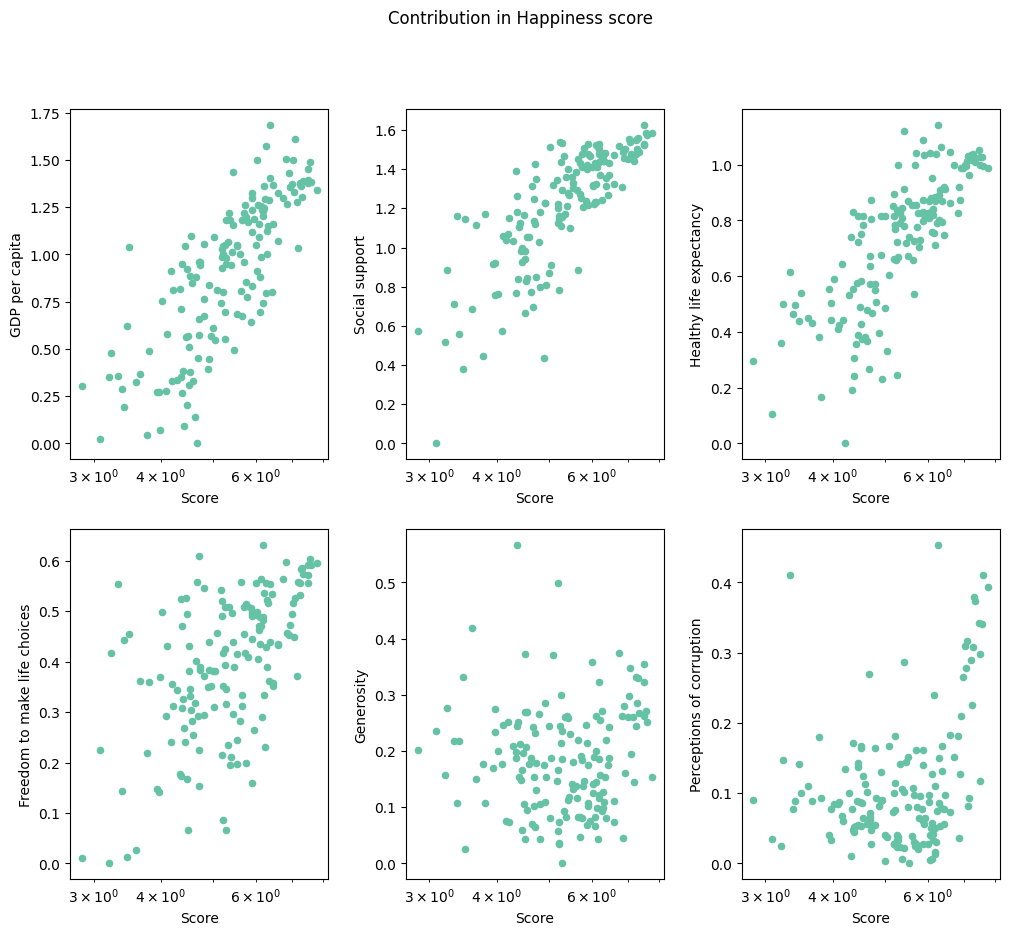

In [32]:
#Matriz de gráficos
fig,axs = plt.subplots(2,3,figsize=(12,10))
plt.subplots_adjust(wspace=0.3,hspace=0.2)
fig.suptitle('Contribution in Happiness score', fontsize=12)
#Graficos
happiness.plot(kind='scatter',x='Score',y='GDP per capita',color='#66C2A5',logx=True,ax=axs[0,0])
happiness.plot(kind='scatter',x='Score',y='Social support',color='#66C2A5',logx=True,ax=axs[0,1])
happiness.plot(kind='scatter',x='Score',y='Healthy life expectancy',color='#66C2A5',logx=True,ax=axs[0,2])
happiness.plot(kind='scatter',x='Score',y='Freedom to make life choices',color='#66C2A5',logx=True,ax=axs[1,0])
happiness.plot(kind='scatter',x='Score',y='Generosity',color='#66C2A5',logx=True,ax=axs[1,1])
happiness.plot(kind='scatter',x='Score',y='Perceptions of corruption',color='#66C2A5',logx=True,ax=axs[1,2])

Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<ipython-input-27-6b4ffa2b71be>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(round(happiness.corr(),2),annot=True)


<Axes: >

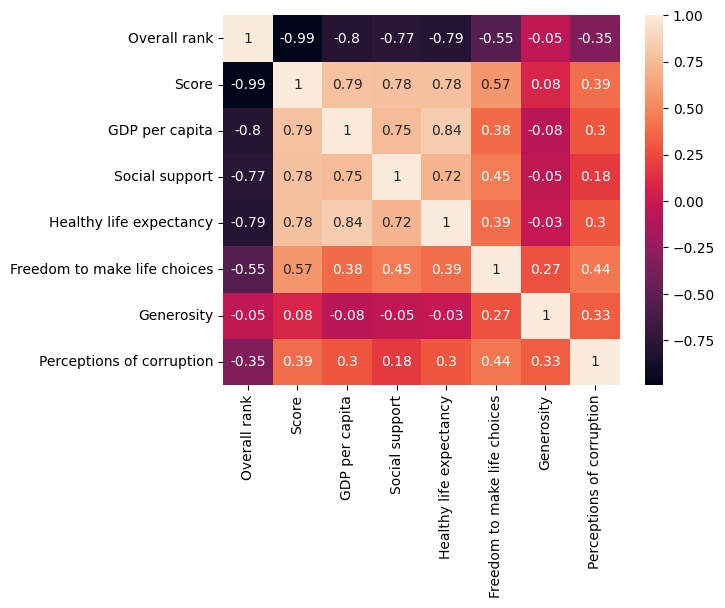

In [27]:
sns.heatmap(round(happiness.corr(),2),annot=True)


9.	Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

Text(0.5, 1.0, 'World Happiness Report')

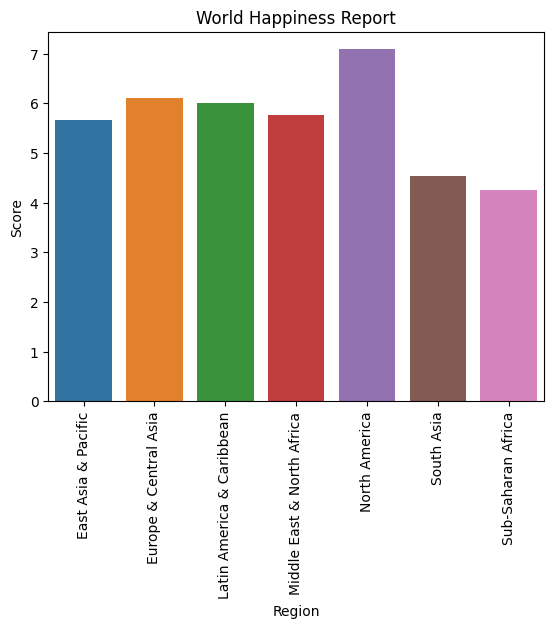

In [61]:
# Lee la otra tabla
metadata = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Metadata.csv")
# Combina los DataFrames en función de los campos comunes "ID" y "Identificador"
felicidad = happiness.merge(metadata, left_on='Country or region', right_on='TableName', how='inner')
# Selecciona y agrupa
felicidad = felicidad[['Region','Score']]
felicidad = felicidad.groupby('Region').aggregate("mean")
# Formatea
sns.barplot(x=felicidad.index,y='Score',data=felicidad)
plt.xticks(rotation=90)
plt.title('World Happiness Report')